# Running Machine Learning models

In [1]:
# Import our dependencies
import math
# import pandas_datareader as web

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import numpy as np
import datetime
import tensorflow as tf
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

from cryptocompare_config import API_Key
import requests
from requests import Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

In [2]:
Daily_News_df = pd.read_csv("Daily_Coinwise_Senti_score(2016to2021).csv")
Daily_News_df

,Unnamed: 0,Dt_Rev_time,Coin_Symbol,Polarity
0,0,2016-07-11,BUSD,0.331579
1,1,2016-07-11,DOGE,0.331579
2,2,2016-07-11,XLM,0.331579
3,3,2016-07-23,BUSD,0.285714
4,4,2016-07-23,DOGE,0.285714
...,...,...,...,...
12899,12899,2021-07-06,ETH,0.064185
12900,12900,2021-07-06,LTC,0.136327
12901,12901,2021-07-06,USDT,0.081108
12902,12902,2021-07-06,XLM,0.095572


In [6]:
# selecting rows based on condition
df = Daily_News_df[(Daily_News_df['Coin_Symbol'] == 'ADA')]
df

,Unnamed: 0,Dt_Rev_time,Coin_Symbol,Polarity
625,625,2017-11-30,ADA,0.268545
633,633,2017-12-01,ADA,0.171000
740,740,2017-12-17,ADA,0.292894
749,749,2017-12-18,ADA,-0.086458
853,853,2018-01-02,ADA,-0.033333
...,...,...,...,...
12857,12857,2021-07-02,ADA,0.150488
12866,12866,2021-07-03,ADA,0.164256
12876,12876,2021-07-04,ADA,0.154857
12885,12885,2021-07-05,ADA,0.118019


In [7]:
df.drop('Unnamed: 0', axis=1)

,Dt_Rev_time,Coin_Symbol,Polarity
625,2017-11-30,ADA,0.268545
633,2017-12-01,ADA,0.171000
740,2017-12-17,ADA,0.292894
749,2017-12-18,ADA,-0.086458
853,2018-01-02,ADA,-0.033333
...,...,...,...
12857,2021-07-02,ADA,0.150488
12866,2021-07-03,ADA,0.164256
12876,2021-07-04,ADA,0.154857
12885,2021-07-05,ADA,0.118019


In [11]:
# import bitcoin 5 year data
Cardano_df = pd.read_csv("C:/UC_Berkeley/Analysis_Projects_Class_Folder/Module20_Final_Project/Cryptocurrency-Analysis/Data/Cardano(fiveyears).csv")
Cardano_df

,Unnamed: 0,Name,Date,High,Low,Open,Close,Volume,Marketcap
0,0,Cardano,2017-10-02 23:59:59,0.030088,0.019969,0.024607,0.025932,5.764130e+07,6.288991e+08
1,1,Cardano,2017-10-03 23:59:59,0.027425,0.020690,0.025757,0.020816,1.699780e+07,5.396927e+08
2,2,Cardano,2017-10-04 23:59:59,0.022806,0.020864,0.020864,0.021931,9.000050e+06,5.686195e+08
3,3,Cardano,2017-10-05 23:59:59,0.022154,0.020859,0.021951,0.021489,5.562510e+06,5.571390e+08
4,4,Cardano,2017-10-06 23:59:59,0.021542,0.018360,0.021359,0.018539,7.780710e+06,4.806646e+08
...,...,...,...,...,...,...,...,...,...
1368,1368,Cardano,2021-07-01 23:59:59,1.383814,1.304074,1.383814,1.335611,2.002168e+09,4.266788e+10
1369,1369,Cardano,2021-07-02 23:59:59,1.394397,1.286607,1.332942,1.394397,2.159410e+09,4.454587e+10
1370,1370,Cardano,2021-07-03 23:59:59,1.441714,1.359664,1.394152,1.406836,2.028094e+09,4.494324e+10
1371,1371,Cardano,2021-07-04 23:59:59,1.493717,1.382153,1.404008,1.458184,1.806362e+09,4.658364e+10


In [12]:
Cardano_df.drop('Unnamed: 0', axis=1)

,Name,Date,High,Low,Open,Close,Volume,Marketcap
0,Cardano,2017-10-02 23:59:59,0.030088,0.019969,0.024607,0.025932,5.764130e+07,6.288991e+08
1,Cardano,2017-10-03 23:59:59,0.027425,0.020690,0.025757,0.020816,1.699780e+07,5.396927e+08
2,Cardano,2017-10-04 23:59:59,0.022806,0.020864,0.020864,0.021931,9.000050e+06,5.686195e+08
3,Cardano,2017-10-05 23:59:59,0.022154,0.020859,0.021951,0.021489,5.562510e+06,5.571390e+08
4,Cardano,2017-10-06 23:59:59,0.021542,0.018360,0.021359,0.018539,7.780710e+06,4.806646e+08
...,...,...,...,...,...,...,...,...
1368,Cardano,2021-07-01 23:59:59,1.383814,1.304074,1.383814,1.335611,2.002168e+09,4.266788e+10
1369,Cardano,2021-07-02 23:59:59,1.394397,1.286607,1.332942,1.394397,2.159410e+09,4.454587e+10
1370,Cardano,2021-07-03 23:59:59,1.441714,1.359664,1.394152,1.406836,2.028094e+09,4.494324e+10
1371,Cardano,2021-07-04 23:59:59,1.493717,1.382153,1.404008,1.458184,1.806362e+09,4.658364e+10


In [13]:
# change date to yyyy-mm-dd format
Cardano_df['Date'] = pd.to_datetime(Cardano_df.Date, format='%Y-%m-%d %H:%M:%S')

In [14]:
Cardano_df['Dt_Rev_time'] = Cardano_df['Date'].dt.strftime('%Y-%m-%d')
# Bitcoin_Rev_df["Dt_Rev_time"] = Bitcoin_df['Date'].dt.date
Cardano_df

,Unnamed: 0,Name,Date,High,Low,Open,Close,Volume,Marketcap,Dt_Rev_time
0,0,Cardano,2017-10-02 23:59:59,0.030088,0.019969,0.024607,0.025932,5.764130e+07,6.288991e+08,2017-10-02
1,1,Cardano,2017-10-03 23:59:59,0.027425,0.020690,0.025757,0.020816,1.699780e+07,5.396927e+08,2017-10-03
2,2,Cardano,2017-10-04 23:59:59,0.022806,0.020864,0.020864,0.021931,9.000050e+06,5.686195e+08,2017-10-04
3,3,Cardano,2017-10-05 23:59:59,0.022154,0.020859,0.021951,0.021489,5.562510e+06,5.571390e+08,2017-10-05
4,4,Cardano,2017-10-06 23:59:59,0.021542,0.018360,0.021359,0.018539,7.780710e+06,4.806646e+08,2017-10-06
...,...,...,...,...,...,...,...,...,...,...
1368,1368,Cardano,2021-07-01 23:59:59,1.383814,1.304074,1.383814,1.335611,2.002168e+09,4.266788e+10,2021-07-01
1369,1369,Cardano,2021-07-02 23:59:59,1.394397,1.286607,1.332942,1.394397,2.159410e+09,4.454587e+10,2021-07-02
1370,1370,Cardano,2021-07-03 23:59:59,1.441714,1.359664,1.394152,1.406836,2.028094e+09,4.494324e+10,2021-07-03
1371,1371,Cardano,2021-07-04 23:59:59,1.493717,1.382153,1.404008,1.458184,1.806362e+09,4.658364e+10,2021-07-04


In [15]:
Cardano_df.drop('Unnamed: 0', axis=1)

,Name,Date,High,Low,Open,Close,Volume,Marketcap,Dt_Rev_time
0,Cardano,2017-10-02 23:59:59,0.030088,0.019969,0.024607,0.025932,5.764130e+07,6.288991e+08,2017-10-02
1,Cardano,2017-10-03 23:59:59,0.027425,0.020690,0.025757,0.020816,1.699780e+07,5.396927e+08,2017-10-03
2,Cardano,2017-10-04 23:59:59,0.022806,0.020864,0.020864,0.021931,9.000050e+06,5.686195e+08,2017-10-04
3,Cardano,2017-10-05 23:59:59,0.022154,0.020859,0.021951,0.021489,5.562510e+06,5.571390e+08,2017-10-05
4,Cardano,2017-10-06 23:59:59,0.021542,0.018360,0.021359,0.018539,7.780710e+06,4.806646e+08,2017-10-06
...,...,...,...,...,...,...,...,...,...
1368,Cardano,2021-07-01 23:59:59,1.383814,1.304074,1.383814,1.335611,2.002168e+09,4.266788e+10,2021-07-01
1369,Cardano,2021-07-02 23:59:59,1.394397,1.286607,1.332942,1.394397,2.159410e+09,4.454587e+10,2021-07-02
1370,Cardano,2021-07-03 23:59:59,1.441714,1.359664,1.394152,1.406836,2.028094e+09,4.494324e+10,2021-07-03
1371,Cardano,2021-07-04 23:59:59,1.493717,1.382153,1.404008,1.458184,1.806362e+09,4.658364e+10,2021-07-04


In [16]:
Cardano_NN_df= Cardano_df.drop(['Name','Date'], axis=1)
Cardano_NN_df

,Unnamed: 0,High,Low,Open,Close,Volume,Marketcap,Dt_Rev_time
0,0,0.030088,0.019969,0.024607,0.025932,5.764130e+07,6.288991e+08,2017-10-02
1,1,0.027425,0.020690,0.025757,0.020816,1.699780e+07,5.396927e+08,2017-10-03
2,2,0.022806,0.020864,0.020864,0.021931,9.000050e+06,5.686195e+08,2017-10-04
3,3,0.022154,0.020859,0.021951,0.021489,5.562510e+06,5.571390e+08,2017-10-05
4,4,0.021542,0.018360,0.021359,0.018539,7.780710e+06,4.806646e+08,2017-10-06
...,...,...,...,...,...,...,...,...
1368,1368,1.383814,1.304074,1.383814,1.335611,2.002168e+09,4.266788e+10,2021-07-01
1369,1369,1.394397,1.286607,1.332942,1.394397,2.159410e+09,4.454587e+10,2021-07-02
1370,1370,1.441714,1.359664,1.394152,1.406836,2.028094e+09,4.494324e+10,2021-07-03
1371,1371,1.493717,1.382153,1.404008,1.458184,1.806362e+09,4.658364e+10,2021-07-04


In [17]:
Cardano_NN_df.drop('Unnamed: 0', axis=1)

,High,Low,Open,Close,Volume,Marketcap,Dt_Rev_time
0,0.030088,0.019969,0.024607,0.025932,5.764130e+07,6.288991e+08,2017-10-02
1,0.027425,0.020690,0.025757,0.020816,1.699780e+07,5.396927e+08,2017-10-03
2,0.022806,0.020864,0.020864,0.021931,9.000050e+06,5.686195e+08,2017-10-04
3,0.022154,0.020859,0.021951,0.021489,5.562510e+06,5.571390e+08,2017-10-05
4,0.021542,0.018360,0.021359,0.018539,7.780710e+06,4.806646e+08,2017-10-06
...,...,...,...,...,...,...,...
1368,1.383814,1.304074,1.383814,1.335611,2.002168e+09,4.266788e+10,2021-07-01
1369,1.394397,1.286607,1.332942,1.394397,2.159410e+09,4.454587e+10,2021-07-02
1370,1.441714,1.359664,1.394152,1.406836,2.028094e+09,4.494324e+10,2021-07-03
1371,1.493717,1.382153,1.404008,1.458184,1.806362e+09,4.658364e+10,2021-07-04


In [18]:
# Join both df
NN_df = pd.merge(Cardano_NN_df, df, how="left", on="Dt_Rev_time")
NN_df

,Unnamed: 0_x,High,Low,Open,Close,Volume,Marketcap,Dt_Rev_time,Unnamed: 0_y,Coin_Symbol,Polarity
0,0,0.030088,0.019969,0.024607,0.025932,5.764130e+07,6.288991e+08,2017-10-02,NaN,NaN,NaN
1,1,0.027425,0.020690,0.025757,0.020816,1.699780e+07,5.396927e+08,2017-10-03,NaN,NaN,NaN
2,2,0.022806,0.020864,0.020864,0.021931,9.000050e+06,5.686195e+08,2017-10-04,NaN,NaN,NaN
3,3,0.022154,0.020859,0.021951,0.021489,5.562510e+06,5.571390e+08,2017-10-05,NaN,NaN,NaN
4,4,0.021542,0.018360,0.021359,0.018539,7.780710e+06,4.806646e+08,2017-10-06,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1368,1368,1.383814,1.304074,1.383814,1.335611,2.002168e+09,4.266788e+10,2021-07-01,12848.0,ADA,0.162911
1369,1369,1.394397,1.286607,1.332942,1.394397,2.159410e+09,4.454587e+10,2021-07-02,12857.0,ADA,0.150488
1370,1370,1.441714,1.359664,1.394152,1.406836,2.028094e+09,4.494324e+10,2021-07-03,12866.0,ADA,0.164256
1371,1371,1.493717,1.382153,1.404008,1.458184,1.806362e+09,4.658364e+10,2021-07-04,12876.0,ADA,0.154857


In [19]:
NN_df = NN_df.drop(['Unnamed: 0_x','Unnamed: 0_y','Coin_Symbol'], axis=1)

In [20]:
# Replace NaN as '0'
NN_df.isnull().sum().sum()
NN_df.isna().sum()

High             0
Low              0
Open             0
Close            0
Volume           0
Marketcap        0
Dt_Rev_time      0
Polarity       236
dtype: int64

In [21]:
# keep only rows without NaN values
Datewise_NN_df = NN_df[NN_df['Polarity'].notna()]
Datewise_NN_df

,High,Low,Open,Close,Volume,Marketcap,Dt_Rev_time,Polarity
59,0.128303,0.094930,0.094930,0.119883,1.243450e+08,3.108215e+09,2017-11-30,0.268545
60,0.131352,0.113031,0.116622,0.131352,7.365760e+07,3.405573e+09,2017-12-01,0.171000
76,0.592417,0.378013,0.386775,0.513011,6.281430e+08,1.330087e+10,2017-12-17,0.292894
77,0.526496,0.467403,0.511939,0.518198,2.534630e+08,1.343536e+10,2017-12-18,-0.086458
92,0.794646,0.697856,0.724676,0.782587,2.897120e+08,2.029019e+10,2018-01-02,-0.033333
...,...,...,...,...,...,...,...,...
1368,1.383814,1.304074,1.383814,1.335611,2.002168e+09,4.266788e+10,2021-07-01,0.162911
1369,1.394397,1.286607,1.332942,1.394397,2.159410e+09,4.454587e+10,2021-07-02,0.150488
1370,1.441714,1.359664,1.394152,1.406836,2.028094e+09,4.494324e+10,2021-07-03,0.164256
1371,1.493717,1.382153,1.404008,1.458184,1.806362e+09,4.658364e+10,2021-07-04,0.154857


In [22]:
Datewise_NN_df.dtypes

High           float64
Low            float64
Open           float64
Close          float64
Volume         float64
Marketcap      float64
Dt_Rev_time     object
Polarity       float64
dtype: object

In [23]:
# Determine the number of unique values in each column.
Datewise_NN_df.nunique()

High           1137
Low            1137
Open           1137
Close          1137
Volume         1137
Marketcap      1137
Dt_Rev_time    1137
Polarity       1063
dtype: int64

In [24]:
Datewise_NN_df = Datewise_NN_df.rename(columns={'Dt_Rev_time': 'Date'})
Datewise_NN_df

,High,Low,Open,Close,Volume,Marketcap,Date,Polarity
59,0.128303,0.094930,0.094930,0.119883,1.243450e+08,3.108215e+09,2017-11-30,0.268545
60,0.131352,0.113031,0.116622,0.131352,7.365760e+07,3.405573e+09,2017-12-01,0.171000
76,0.592417,0.378013,0.386775,0.513011,6.281430e+08,1.330087e+10,2017-12-17,0.292894
77,0.526496,0.467403,0.511939,0.518198,2.534630e+08,1.343536e+10,2017-12-18,-0.086458
92,0.794646,0.697856,0.724676,0.782587,2.897120e+08,2.029019e+10,2018-01-02,-0.033333
...,...,...,...,...,...,...,...,...
1368,1.383814,1.304074,1.383814,1.335611,2.002168e+09,4.266788e+10,2021-07-01,0.162911
1369,1.394397,1.286607,1.332942,1.394397,2.159410e+09,4.454587e+10,2021-07-02,0.150488
1370,1.441714,1.359664,1.394152,1.406836,2.028094e+09,4.494324e+10,2021-07-03,0.164256
1371,1.493717,1.382153,1.404008,1.458184,1.806362e+09,4.658364e+10,2021-07-04,0.154857


In [25]:
Datewise_NN_df = Datewise_NN_df[["Date", "Open", "High", "Low", "Close", "Volume", "Marketcap", "Polarity"]]
Datewise_NN_df

,Date,Open,High,Low,Close,Volume,Marketcap,Polarity
59,2017-11-30,0.094930,0.128303,0.094930,0.119883,1.243450e+08,3.108215e+09,0.268545
60,2017-12-01,0.116622,0.131352,0.113031,0.131352,7.365760e+07,3.405573e+09,0.171000
76,2017-12-17,0.386775,0.592417,0.378013,0.513011,6.281430e+08,1.330087e+10,0.292894
77,2017-12-18,0.511939,0.526496,0.467403,0.518198,2.534630e+08,1.343536e+10,-0.086458
92,2018-01-02,0.724676,0.794646,0.697856,0.782587,2.897120e+08,2.029019e+10,-0.033333
...,...,...,...,...,...,...,...,...
1368,2021-07-01,1.383814,1.383814,1.304074,1.335611,2.002168e+09,4.266788e+10,0.162911
1369,2021-07-02,1.332942,1.394397,1.286607,1.394397,2.159410e+09,4.454587e+10,0.150488
1370,2021-07-03,1.394152,1.441714,1.359664,1.406836,2.028094e+09,4.494324e+10,0.164256
1371,2021-07-04,1.404008,1.493717,1.382153,1.458184,1.806362e+09,4.658364e+10,0.154857


In [26]:
Datewise_NN_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume       float64
Marketcap    float64
Polarity     float64
dtype: object

In [27]:
Datewise_NN_df['Date'] = pd.to_datetime(Datewise_NN_df['Date'])
Datewise_NN_df

Datewise_NN_df['Epoch_Dt'] = (Datewise_NN_df['Date'] - dt.datetime(1970,1,1)).dt.total_seconds()
Datewise_NN_df

# Final_NN_df['epoch'] = (Final_NN_df['Date'] - dt.datetime(1970,1,1)).dt.total_seconds()
# Final_NN_df

,Date,Open,High,Low,Close,Volume,Marketcap,Polarity,Epoch_Dt
59,2017-11-30,0.094930,0.128303,0.094930,0.119883,1.243450e+08,3.108215e+09,0.268545,1.512000e+09
60,2017-12-01,0.116622,0.131352,0.113031,0.131352,7.365760e+07,3.405573e+09,0.171000,1.512086e+09
76,2017-12-17,0.386775,0.592417,0.378013,0.513011,6.281430e+08,1.330087e+10,0.292894,1.513469e+09
77,2017-12-18,0.511939,0.526496,0.467403,0.518198,2.534630e+08,1.343536e+10,-0.086458,1.513555e+09
92,2018-01-02,0.724676,0.794646,0.697856,0.782587,2.897120e+08,2.029019e+10,-0.033333,1.514851e+09
...,...,...,...,...,...,...,...,...,...
1368,2021-07-01,1.383814,1.383814,1.304074,1.335611,2.002168e+09,4.266788e+10,0.162911,1.625098e+09
1369,2021-07-02,1.332942,1.394397,1.286607,1.394397,2.159410e+09,4.454587e+10,0.150488,1.625184e+09
1370,2021-07-03,1.394152,1.441714,1.359664,1.406836,2.028094e+09,4.494324e+10,0.164256,1.625270e+09
1371,2021-07-04,1.404008,1.493717,1.382153,1.458184,1.806362e+09,4.658364e+10,0.154857,1.625357e+09


In [28]:
Final_NN_df = Datewise_NN_df[["Epoch_Dt", "Open", "High", "Low", "Close", "Volume", "Marketcap", "Polarity"]]
Final_NN_df

,Epoch_Dt,Open,High,Low,Close,Volume,Marketcap,Polarity
59,1.512000e+09,0.094930,0.128303,0.094930,0.119883,1.243450e+08,3.108215e+09,0.268545
60,1.512086e+09,0.116622,0.131352,0.113031,0.131352,7.365760e+07,3.405573e+09,0.171000
76,1.513469e+09,0.386775,0.592417,0.378013,0.513011,6.281430e+08,1.330087e+10,0.292894
77,1.513555e+09,0.511939,0.526496,0.467403,0.518198,2.534630e+08,1.343536e+10,-0.086458
92,1.514851e+09,0.724676,0.794646,0.697856,0.782587,2.897120e+08,2.029019e+10,-0.033333
...,...,...,...,...,...,...,...,...
1368,1.625098e+09,1.383814,1.383814,1.304074,1.335611,2.002168e+09,4.266788e+10,0.162911
1369,1.625184e+09,1.332942,1.394397,1.286607,1.394397,2.159410e+09,4.454587e+10,0.150488
1370,1.625270e+09,1.394152,1.441714,1.359664,1.406836,2.028094e+09,4.494324e+10,0.164256
1371,1.625357e+09,1.404008,1.493717,1.382153,1.458184,1.806362e+09,4.658364e+10,0.154857


In [29]:
Final_NN_df.dtypes

Epoch_Dt     float64
Open         float64
High         float64
Low          float64
Close        float64
Volume       float64
Marketcap    float64
Polarity     float64
dtype: object

In [30]:
Final_NN_df.shape

(1137, 8)

In [31]:
Datewise_NN_df =  Datewise_NN_df.set_index('Date')

<function matplotlib.pyplot.show(close=None, block=None)>

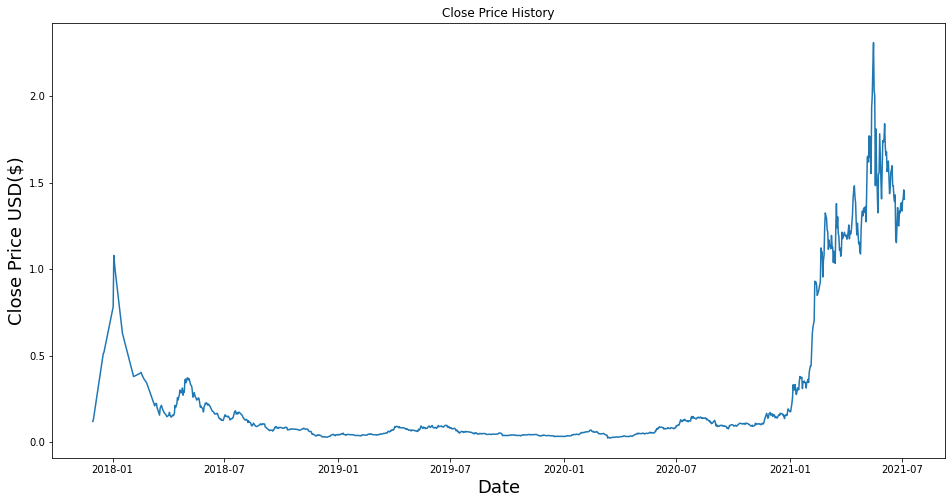

In [32]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(Datewise_NN_df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.show

In [33]:
#create a new df with the close columm
data = Datewise_NN_df.filter(['Close'])
# convert the dataframe to a numpy array
dataset = data.values
# number of rows to train
training_data_len = math.ceil( len(dataset) * .8 )

print(training_data_len)

910


In [34]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.04197631],
       [0.04699523],
       [0.21401213],
       ...,
       [0.6051568 ],
       [0.62762729],
       [0.60430879]])

In [35]:
training_data_len

910

In [36]:
# create the training data_set
# scaled training dataset
train_data = scaled_data[0:training_data_len, :]

#Split the data
x_train = []
y_train = []

for i in range (60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<60:
        print(x_train)
        print(y_train)
        print()

In [37]:
x_train

[array([0.04197631, 0.04699523, 0.21401213, 0.21628202, 0.33198067,
        0.46198213, 0.42692928, 0.26481445, 0.1555005 , 0.16320457,
        0.16622494, 0.15826399, 0.14899677, 0.14006607, 0.12272105,
        0.11795419, 0.08675407, 0.08135662, 0.08741705, 0.08711248,
        0.07684445, 0.06779297, 0.05784921, 0.07600687, 0.08280773,
        0.07233577, 0.06294778, 0.0595572 , 0.05393438, 0.05794986,
        0.06497871, 0.05749957, 0.05461223, 0.05272746, 0.05804351,
        0.05651495, 0.05793324, 0.06217015, 0.08238938, 0.07726893,
        0.08639655, 0.10182485, 0.09617008, 0.1034418 , 0.10870054,
        0.12134259, 0.11667463, 0.1144669 , 0.11575259, 0.12643109,
        0.10839247, 0.11830034, 0.11575959, 0.146123  , 0.14926633,
        0.13975317, 0.1464814 , 0.15248844, 0.15130209, 0.14713299]),
 array([0.04699523, 0.21401213, 0.21628202, 0.33198067, 0.46198213,
        0.42692928, 0.26481445, 0.1555005 , 0.16320457, 0.16622494,
        0.15826399, 0.14899677, 0.14006607, 0.

In [38]:
y_train

[0.1498269152445518,
 0.1426864662651812,
 0.13619017418578117,
 0.13320394511688832,
 0.1311213641578525,
 0.11952301869253006,
 0.10334816224892447,
 0.10807650499408197,
 0.11462225129612312,
 0.10917141000663719,
 0.10336040842905629,
 0.10170626119047996,
 0.09614382185691708,
 0.09696652649820292,
 0.1016016665529321,
 0.09840888263747029,
 0.08771725008746921,
 0.07829337105734761,
 0.08096977437724975,
 0.07732275368766413,
 0.07421661247476458,
 0.06600097105075066,
 0.07843208936935232,
 0.08191238464167962,
 0.08806996355037218,
 0.08688535755065312,
 0.08917623442659611,
 0.08316787893970189,
 0.08599263840666456,
 0.08391575016075713,
 0.081901879531886,
 0.07938082272384814,
 0.06884410630877381,
 0.06494720616090675,
 0.06073392027618284,
 0.06082800980393707,
 0.06133344187104024,
 0.06267602229028764,
 0.06040046292080348,
 0.05070920243694048,
 0.049846681408069374,
 0.04758643954504409,
 0.048709338621127515,
 0.04469647797204393,
 0.04528505755930748,
 0.04453061982

In [39]:
# convert the x_train and y_train into numpy arrays
x_train, y_train, = np.array(x_train), np.array(y_train)

In [40]:
#reshape the data
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(850, 60, 1)

# Running the Machine Learning model

In [41]:
# Building the model by importing the crucial libraries and adding different layers to LSTM
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [42]:
es = EarlyStopping(monitor = 'loss', patience = 20, verbose = 1)
# Set a seed value
seed_value= 12321

In [43]:
#Attempt 1
# adding layers to LSTM
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

In [44]:
# #Attempt 2
# # adding layers to LSTM
# model = Sequential()

# model.add(LSTM(units=50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
# model.add(Dropout(0.2))

# model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.2))

# model.add(LSTM(units=50))
# model.add(Dropout(0.2))

# model.add(Dense(units=1))

In [45]:
# fitting the model
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs=100, batch_size=32, callbacks = [es])

Epoch 1/100
27/27 [==============================] - 11s 118ms/step - loss: 3.0554e-04
Epoch 2/100
27/27 [==============================] - 4s 131ms/step - loss: 8.9146e-05
Epoch 3/100
27/27 [==============================] - 3s 119ms/step - loss: 6.7003e-05
Epoch 4/100
27/27 [==============================] - 4s 133ms/step - loss: 6.4639e-05
Epoch 5/100
27/27 [==============================] - 3s 125ms/step - loss: 6.8573e-05
Epoch 6/100
27/27 [==============================] - 3s 124ms/step - loss: 6.0062e-05
Epoch 7/100
27/27 [==============================] - 4s 133ms/step - loss: 5.7310e-05
Epoch 8/100
27/27 [==============================] - 4s 132ms/step - loss: 4.6702e-05
Epoch 9/100
27/27 [==============================] - 3s 114ms/step - loss: 4.2566e-05
Epoch 10/100
27/27 [==============================] - 3s 126ms/step - loss: 5.0298e-05
Epoch 11/100
27/27 [==============================] - 3s 123ms/step - loss: 5.3549e-05
Epoch 12/100
27/27 [==============================]

27/27 [==============================] - 2s 82ms/step - loss: 1.7845e-05
Epoch 96/100
27/27 [==============================] - 2s 82ms/step - loss: 1.6803e-05
Epoch 97/100
27/27 [==============================] - 2s 75ms/step - loss: 1.7100e-05
Epoch 98/100
27/27 [==============================] - 2s 85ms/step - loss: 2.4806e-05
Epoch 99/100
27/27 [==============================] - 2s 77ms/step - loss: 2.1780e-05
Epoch 100/100
27/27 [==============================] - 2s 86ms/step - loss: 1.6731e-05


In [46]:
# train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
# test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
# print(f'Train accuracy: {train_acc*100:.3f} % || Test accuracy: {test_acc*100:.3f} %')
# print(f'Train loss: {train_loss:.3f} || Test loss: {test_loss:.3f}')

# Testing data

In [47]:
print(scaled_data.shape)
print(training_data_len)

(1137, 1)
910


In [48]:
print(scaled_data)

[[0.04197631]
 [0.04699523]
 [0.21401213]
 ...
 [0.6051568 ]
 [0.62762729]
 [0.60430879]]


In [49]:
# create test data
# create a new array containing scaled values from index
test_data = scaled_data[training_data_len - 60:, :]

#Create the x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [50]:
print(test_data)


[[0.03074446]
 [0.0293723 ]
 [0.02962428]
 [0.02865102]
 [0.02471032]
 [0.02529071]
 [0.02310662]
 [0.02575575]
 [0.0318948 ]
 [0.03133393]
 [0.03356743]
 [0.03379202]
 [0.03374   ]
 [0.03234114]
 [0.03017735]
 [0.03039263]
 [0.03167733]
 [0.03220064]
 [0.03012792]
 [0.03056232]
 [0.03411789]
 [0.03547428]
 [0.03613623]
 [0.03766648]
 [0.03714913]
 [0.03646853]
 [0.03617903]
 [0.03505358]
 [0.03594631]
 [0.03707253]
 [0.03436662]
 [0.03598279]
 [0.03790163]
 [0.03681247]
 [0.03680909]
 [0.03605445]
 [0.03463063]
 [0.0345124 ]
 [0.03282756]
 [0.03125171]
 [0.03037351]
 [0.03023659]
 [0.0324863 ]
 [0.02983709]
 [0.03040221]
 [0.03124882]
 [0.03196006]
 [0.03725974]
 [0.03387886]
 [0.03617277]
 [0.03560576]
 [0.03581579]
 [0.03588566]
 [0.03525555]
 [0.03607199]
 [0.03350778]
 [0.03502919]
 [0.03747645]
 [0.03607718]
 [0.03584239]
 [0.04125106]
 [0.04769233]
 [0.05286275]
 [0.05669171]
 [0.06229864]
 [0.05741472]
 [0.05002752]
 [0.05122959]
 [0.06162835]
 [0.0624371 ]
 [0.06448037]
 [0.05

In [51]:
#convert data into numpy array
x_test = np.array(x_test)

In [52]:
# reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
x_test.shape

(227, 60, 1)

In [53]:
# # Predicting Jan & Feb prices
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions

array([[0.10082225],
       [0.10317802],
       [0.10890515],
       [0.11794063],
       [0.12847765],
       [0.13939296],
       [0.14643814],
       [0.14593813],
       [0.1406557 ],
       [0.13845608],
       [0.14111787],
       [0.14702635],
       [0.15075748],
       [0.15141548],
       [0.15115781],
       [0.14863075],
       [0.14654365],
       [0.1459333 ],
       [0.14573471],
       [0.14333783],
       [0.14052273],
       [0.1377288 ],
       [0.13509408],
       [0.13386007],
       [0.13557301],
       [0.13973135],
       [0.14368023],
       [0.14805849],
       [0.15153259],
       [0.1535723 ],
       [0.15422814],
       [0.15354505],
       [0.15072808],
       [0.14751469],
       [0.14213641],
       [0.13850702],
       [0.13870925],
       [0.14161395],
       [0.1445601 ],
       [0.1497846 ],
       [0.15865922],
       [0.16695176],
       [0.17148449],
       [0.17123498],
       [0.16840677],
       [0.17285697],
       [0.18895754],
       [0.221

In [54]:
#get the root mean squared error(RMSE)
rmse = np.sqrt( np.mean( predictions-y_test )**2)
rmse

0.27069459116803624

C:\Users\lavin\AppData\Local\Temp/ipykernel_27772/2633701516.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


<function matplotlib.pyplot.show(close=None, block=None)>

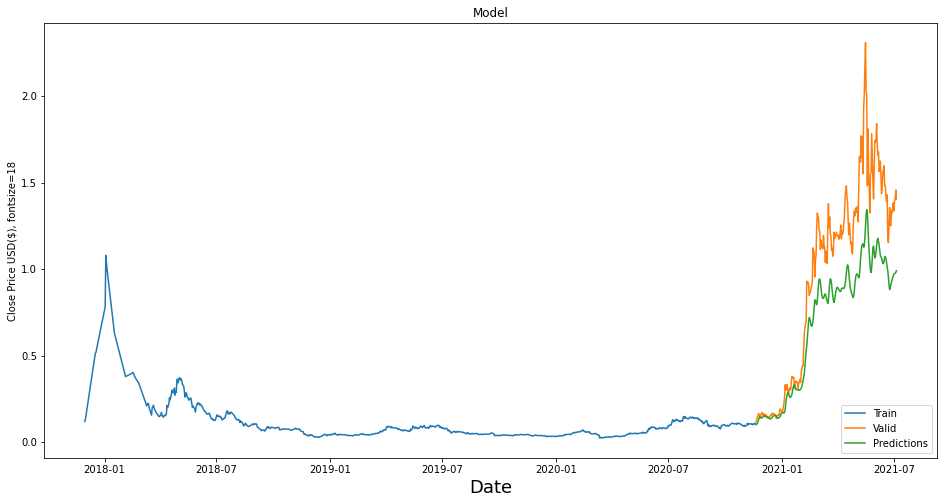

In [55]:
#plot
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#visualize
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($), fontsize=18')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')
plt.show

In [56]:
# show valid and predicted 
valid

,Close,Predictions
Date,,
2020-11-20,0.118226,0.100822
2020-11-21,0.132945,0.103178
2020-11-22,0.144760,0.108905
2020-11-23,0.153510,0.117941
2020-11-24,0.166323,0.128478
...,...,...
2021-07-01,1.335611,0.973514
2021-07-02,1.394397,0.975580
2021-07-03,1.406836,0.976585


# Fetch last 60 days data from cryptocompare.com

In [57]:
# fetch data from API
api_endpoint = 'https://min-api.cryptocompare.com/data/v2/histoday?fsym=ADA&tsym=USD&limit=61&aggregate=3&e=CCCAGG&api_key='
api_endpoint += API_Key

In [58]:
# retrieve data
data_retrieved = requests.get(api_endpoint).json()
data_retrieved

{'Response': 'Success',
 'Message': '',
 'HasWarning': False,
 'Type': 100,
 'RateLimit': {},
 'Data': {'Aggregated': True,
  'TimeFrom': 1628294400,
  'TimeTo': 1644192000,
  'Data': [{'time': 1628294400,
    'high': 1.5,
    'low': 1.395,
    'open': 1.402,
    'volumefrom': 117274632.63,
    'volumeto': 170342898.73,
    'close': 1.476,
    'conversionType': 'direct',
    'conversionSymbol': ''},
   {'time': 1628553600,
    'high': 1.895,
    'low': 1.458,
    'open': 1.476,
    'volumefrom': 292505810.59,
    'volumeto': 507168795.47,
    'close': 1.831,
    'conversionType': 'direct',
    'conversionSymbol': ''},
   {'time': 1628812800,
    'high': 2.249,
    'low': 1.824,
    'open': 1.831,
    'volumefrom': 342045231.55,
    'volumeto': 710365457.95,
    'close': 2.169,
    'conversionType': 'direct',
    'conversionSymbol': ''},
   {'time': 1629072000,
    'high': 2.196,
    'low': 1.873,
    'open': 2.169,
    'volumefrom': 244920973.38,
    'volumeto': 504013690.53,
    'clos

In [59]:
data_retrieved_json = data_retrieved['Data']['Data']
data_retrieved_json

[{'time': 1628294400,
  'high': 1.5,
  'low': 1.395,
  'open': 1.402,
  'volumefrom': 117274632.63,
  'volumeto': 170342898.73,
  'close': 1.476,
  'conversionType': 'direct',
  'conversionSymbol': ''},
 {'time': 1628553600,
  'high': 1.895,
  'low': 1.458,
  'open': 1.476,
  'volumefrom': 292505810.59,
  'volumeto': 507168795.47,
  'close': 1.831,
  'conversionType': 'direct',
  'conversionSymbol': ''},
 {'time': 1628812800,
  'high': 2.249,
  'low': 1.824,
  'open': 1.831,
  'volumefrom': 342045231.55,
  'volumeto': 710365457.95,
  'close': 2.169,
  'conversionType': 'direct',
  'conversionSymbol': ''},
 {'time': 1629072000,
  'high': 2.196,
  'low': 1.873,
  'open': 2.169,
  'volumefrom': 244920973.38,
  'volumeto': 504013690.53,
  'close': 2.105,
  'conversionType': 'direct',
  'conversionSymbol': ''},
 {'time': 1629331200,
  'high': 2.581,
  'low': 2.048,
  'open': 2.105,
  'volumefrom': 392007300.68,
  'volumeto': 931198049.65,
  'close': 2.437,
  'conversionType': 'direct',
  'c

In [60]:
last_60_days = pd.json_normalize(data_retrieved_json)
last_60_days

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
0,1628294400,1.500,1.3950,1.402,1.172746e+08,1.703429e+08,1.476,direct,
1,1628553600,1.895,1.4580,1.476,2.925058e+08,5.071688e+08,1.831,direct,
2,1628812800,2.249,1.8240,1.831,3.420452e+08,7.103655e+08,2.169,direct,
3,1629072000,2.196,1.8730,2.169,2.449210e+08,5.040137e+08,2.105,direct,
4,1629331200,2.581,2.0480,2.105,3.920073e+08,9.311980e+08,2.437,direct,
...,...,...,...,...,...,...,...,...,...
57,1643068800,1.158,0.9927,1.067,6.604503e+08,6.994468e+08,1.043,direct,
58,1643328000,1.083,1.0100,1.043,3.019878e+08,3.163632e+08,1.036,direct,
59,1643587200,1.103,1.0100,1.036,3.872645e+08,4.078356e+08,1.027,direct,
60,1643846400,1.178,1.0180,1.027,3.440751e+08,3.749487e+08,1.126,direct,


In [61]:
last_60_days

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
0,1628294400,1.500,1.3950,1.402,1.172746e+08,1.703429e+08,1.476,direct,
1,1628553600,1.895,1.4580,1.476,2.925058e+08,5.071688e+08,1.831,direct,
2,1628812800,2.249,1.8240,1.831,3.420452e+08,7.103655e+08,2.169,direct,
3,1629072000,2.196,1.8730,2.169,2.449210e+08,5.040137e+08,2.105,direct,
4,1629331200,2.581,2.0480,2.105,3.920073e+08,9.311980e+08,2.437,direct,
...,...,...,...,...,...,...,...,...,...
57,1643068800,1.158,0.9927,1.067,6.604503e+08,6.994468e+08,1.043,direct,
58,1643328000,1.083,1.0100,1.043,3.019878e+08,3.163632e+08,1.036,direct,
59,1643587200,1.103,1.0100,1.036,3.872645e+08,4.078356e+08,1.027,direct,
60,1643846400,1.178,1.0180,1.027,3.440751e+08,3.749487e+08,1.126,direct,


In [62]:
last_60_days["Rev_time"] = pd.to_datetime(last_60_days['time'],unit='s')
last_60_days["Date"] = last_60_days['Rev_time'].dt.date

last_60_days = last_60_days.set_index('Date')
Data_Close_last_60 = last_60_days.filter(['close'])
Data_Close_last_60

,close
Date,
2021-08-07,1.476
2021-08-10,1.831
2021-08-13,2.169
2021-08-16,2.105
2021-08-19,2.437
...,...
2022-01-25,1.043
2022-01-28,1.036
2022-01-31,1.027


In [63]:
Close_last_60 = Data_Close_last_60[:60].values
Close_last_60

array([[1.476],
       [1.831],
       [2.169],
       [2.105],
       [2.437],
       [2.72 ],
       [2.946],
       [2.736],
       [2.963],
       [2.913],
       [2.471],
       [2.636],
       [2.398],
       [2.35 ],
       [2.08 ],
       [2.33 ],
       [2.209],
       [2.066],
       [2.25 ],
       [2.234],
       [2.237],
       [2.172],
       [2.173],
       [2.158],
       [2.189],
       [2.165],
       [2.137],
       [2.013],
       [1.949],
       [1.982],
       [2.02 ],
       [2.101],
       [2.052],
       [1.877],
       [1.864],
       [1.779],
       [1.675],
       [1.596],
       [1.548],
       [1.423],
       [1.379],
       [1.211],
       [1.225],
       [1.24 ],
       [1.244],
       [1.328],
       [1.454],
       [1.399],
       [1.309],
       [1.319],
       [1.28 ],
       [1.17 ],
       [1.312],
       [1.292],
       [1.459],
       [1.121],
       [1.067],
       [1.043],
       [1.036],
       [1.027]])

In [64]:
# scale the close_last_60 data
Close_last_60_scaled = scaler.transform(Close_last_60)
# create an empty list
X_test = []
# Append the last 60 days
# for i in range(60, len(Close_last_60_scaled)):
#     X_test.append(Close_last_60_scaled[i-60:i, 0])
X_test.append(Close_last_60_scaled)
#convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(f"Price prediction for 3rd Feb is {pred_price} and actual price is $1.126")

Price prediction for 3rd Feb is [[0.7751691]] and actual price is $1.126


In [62]:
X_test
X_test.shape

(1, 60, 1)

In [63]:
print(len(Data_Close_last_60))
print(len(pred_price))

62
1


In [64]:
new_valid = Data_Close_last_60
# new_valid['Predictions'] = pred_price
new_valid

,close
Date,
2021-08-07,166.51
2021-08-10,165.31
2021-08-13,184.83
2021-08-16,166.68
2021-08-19,179.84
...,...
2022-01-25,106.95
2022-01-28,108.64
2022-01-31,108.36
